In [41]:
#!/usr/bin/env python
# coding: utf-8

# TASK 01:

In[1]:

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif

In[2]:

<AxesSubplot:>

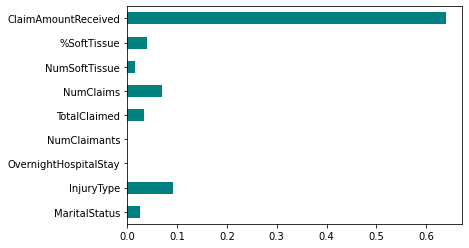

In [54]:
dataset = pd.read_csv('MIFClaimABTFull.csv')
dataset = dataset.replace('CI', 0)
dataset = dataset.replace('Married', 0)
dataset = dataset.replace('Single', 1)
dataset = dataset.replace('Divorced', 2)
dataset = dataset.replace('Soft Tissue', 0)
dataset =  dataset.replace('Back', 1)
dataset = dataset.replace('Broken Limb', 2)
dataset = dataset.replace('Serious', 3)
dataset = dataset.replace('No', 0)
dataset = dataset.replace('Yes', 1)
dataset.fillna(0, inplace = True)
X = dataset[['MaritalStatus','InjuryType','OvernightHospitalStay',
             'NumClaimants','TotalClaimed','NumClaims','NumSoftTissue','%SoftTissue','ClaimAmountReceived']]
y = dataset['FraudFlag']
importance = mutual_info_classif(X , y)
feat_importance = pd.Series(importance, ['MaritalStatus','InjuryType',
                                         'OvernightHospitalStay','NumClaimants','TotalClaimed',
                                         'NumClaims','NumSoftTissue','%SoftTissue','ClaimAmountReceived'])
feat_importance.plot ( kind ='barh', color ='teal')

# TASK 2:

In[3]:

In [55]:
import pandas as pd
churn_df = pd.read_csv('diabetes.csv')
churn_df.head()
churn_df_sel = churn_df.loc[:,['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']]
churn_df_sel.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In[4]:

In [56]:
from sklearn . feature_selection import chi2
X = churn_df_sel.drop ('Outcome', axis =1)
y = churn_df_sel ['Outcome']

In [57]:
chi_scores = chi2 (X , y )
chi_scores

(array([ 111.51969064, 1411.88704064,   17.60537322,   53.10803984,
        2175.56527292,  127.66934333,    5.39268155,  181.30368904]),
 array([4.55261043e-026, 5.48728628e-309, 2.71819252e-005, 3.15697650e-013,
        0.00000000e+000, 1.32590849e-029, 2.02213728e-002, 2.51638830e-041]))

In[5]:

In [58]:
p_values = pd.Series(chi_scores[1], index= X.columns)
print(p_values [:])
p_values .sort_values(ascending=True, inplace=True)

Pregnancies                  4.552610e-26
Glucose                     5.487286e-309
BloodPressure                2.718193e-05
SkinThickness                3.156977e-13
Insulin                      0.000000e+00
BMI                          1.325908e-29
DiabetesPedigreeFunction     2.022137e-02
Age                          2.516388e-41
dtype: float64


In[6]:

In [59]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
X_new = SelectPercentile(chi2, percentile=50) 
X_new.fit_transform(X,y)

array([[148. ,   0. ,  33.6,  50. ],
       [ 85. ,   0. ,  26.6,  31. ],
       [183. ,   0. ,  23.3,  32. ],
       ...,
       [121. , 112. ,  26.2,  30. ],
       [126. ,   0. ,  30.1,  47. ],
       [ 93. ,   0. ,  30.4,  23. ]])

In[7]:

In [60]:
from sklearn . feature_selection import SelectKBest
from sklearn . feature_selection import SelectPercentile
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
X_new = SelectKBest (chi2 , k = 3)
X_new.fit_transform (X , y )

array([[148.,   0.,  50.],
       [ 85.,   0.,  31.],
       [183.,   0.,  32.],
       ...,
       [121., 112.,  30.],
       [126.,   0.,  47.],
       [ 93.,   0.,  23.]])

In[8]:

In [61]:
new_features = []
mask = X_new.get_support ()
for bool, feature in zip(mask, feature_names):
    if bool:
        new_features.append(feature)
new_features

['Glucose', 'Insulin', 'Age']

# TASK 03:

In[9]:

In [62]:
df = pd.read_csv('MIFClaimABTFull.csv')
df.head()

,ID,InsuranceType,IncomeofPolicyHolder,MaritalStatus,NumClaimants,InjuryType,OvernightHospitalStay,ClaimAmount,TotalClaimed,NumClaims,NumSoftTissue,%SoftTissue,ClaimAmountReceived,FraudFlag
0,1,CI,0,NaN,2,Soft Tissue,No,1625,3250,2,2.0,1.0,0,1
1,2,CI,0,NaN,2,Back,Yes,15028,60112,1,0.0,0.0,15028,0
2,3,CI,54613,Married,1,Broken Limb,No,-99999,0,0,0.0,0.0,572,0
3,4,CI,0,NaN,3,Serious,Yes,270200,0,0,0.0,0.0,270200,0
4,5,CI,0,NaN,4,Soft Tissue,No,8869,0,0,0.0,0.0,0,1


In[10]:

In [63]:
from skfeature.function.similarity_based import fisher_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
data= pd.read_csv('MIFClaimABTFull.csv')
df = pd.DataFrame (data)
churn_df = df.loc [: ,['ID','IncomeofPolicyHolder','NumClaimants','InjuryType',
      'OvernightHospitalStay','ClaimAmount','TotalClaimed','NumClaims','NumSoftTissue','%SoftTissue',
                       'ClaimAmountReceived','FraudFlag']]
label_encoder = LabelEncoder()
churn_df ['NumSoftTissue'] = label_encoder.fit_transform (df['NumSoftTissue'])
churn_df ['MaritalStatus'] = label_encoder.fit_transform (df['MaritalStatus'])
churn_df ['InjuryType'] = label_encoder.fit_transform (df['InjuryType'])
churn_df ['OvernightHospitalStay'] = label_encoder.fit_transform (df['OvernightHospitalStay'])
df ['NumSoftTissue'] = label_encoder.fit_transform (df['NumSoftTissue'])
X_train = churn_df.drop ('FraudFlag', axis =1)
y_train = churn_df['FraudFlag']
# calculate score
rank = fisher_score.fisher_score(X_train.to_numpy(), y_train.to_numpy(),mode ='rank')
# print histogram graph
feat_importances = pd . Series(rank)
feat_importances.plot( kind ='barh', color ='teal')
plt.show()

ModuleNotFoundError: No module named 'skfeature'

# TASK 4

In[11]:

In [64]:
df = pd.read_csv('Property.csv',delimiter=';')
df.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent
0,347795,8,https://www.zameen.com/Property/lahore_model_t...,House,220000000,Model Town,Lahore,Punjab,31.483869,74.325686,0,6 Kanal,For Sale,0,07-17-2019,Real Biz International,Usama Khan
1,482892,48,https://www.zameen.com/Property/lahore_multan_...,House,40000000,Multan Road,Lahore,Punjab,31.431593,74.179980,5,1 Kanal,For Sale,5,10-06-2018,Khan Estate,mohsinkhan and B
2,555962,75,https://www.zameen.com/Property/eden_eden_aven...,House,9500000,Eden,Lahore,Punjab,31.499348,74.416959,0,9 Marla,For Sale,3,07-03-2019,Shahum Estate 2,"Babar Hameed, Raja Omar"
3,562843,3821,https://www.zameen.com/Property/gulberg_2_gulb...,House,125000000,Gulberg,Lahore,Punjab,31.522069,74.355512,7,1 Kanal,For Sale,8,04-04-2019,NaN,NaN
4,686990,3522,https://www.zameen.com/Property/allama_iqbal_t...,House,21000000,Allama Iqbal Town,Lahore,Punjab,31.506483,74.286017,5,11 Marla,For Sale,6,04-04-2019,NaN,NaN


<AxesSubplot:>

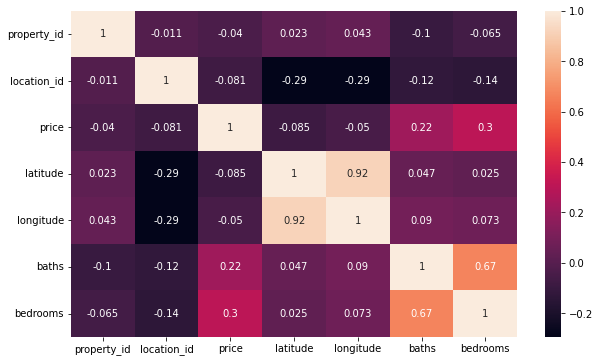

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
# corelation matrix
df = pd.read_csv('Property.csv',delimiter=';')
corr = df.corr ()
plt.figure (figsize=(10 ,6) )
sns.heatmap(corr,annot = True )

In[12]:

In [66]:
from sklearn.feature_selection import VarianceThreshold
x=df[['baths','bedrooms','latitude','longitude','price']]
v_threshold = VarianceThreshold ( threshold =0)
v_threshold.fit(x)
v_threshold.get_support ()

array([ True,  True,  True,  True,  True])

# TASK 5:

In[13]:

In [67]:
import pandas as pd
import numpy as np
data = 'diabetes.csv'
df = pd.read_csv(data)
df.head ()
X = df.iloc[:,1:8]
Y = df.iloc[:,8]
mad = X.mad(axis=0)
print (" Mean absolute deviation of columns :", mad)

 Mean absolute deviation of columns : Glucose                     25.181793
BloodPressure               12.639425
SkinThickness               13.659627
Insulin                     84.505079
BMI                          5.842270
DiabetesPedigreeFunction     0.247309
Age                          9.586405
dtype: float64


# TASK 06:

In[14]:

In [68]:
data = 'Churn_Modelling.csv'
churn_df = pd.read_csv(data)
churn_df = churn_df[['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember','Exited']]
churn_df ['Geography'] = label_encoder.fit_transform ( churn_df ['Geography'])
churn_df ['Gender'] = label_encoder.fit_transform ( churn_df ['Gender'])
# X = churn_df.drop('Exited', axis=1)
# Y = churn_df['Exited']
X = churn_df.iloc[:,1:5]
Y = churn_df.iloc[:,5]
X = X + 1
am = np.mean (X , axis =0)
gm = np.power (np.product (X , axis =0) ,1/X.shape [0])
# ratio of arithmatic mean and geometric mean
disp_ratio = am / gm
print(disp_ratio)
plt.bar ( np.arange(X.shape[1]) , disp_ratio , color ='teal')

NameError: name 'label_encoder' is not defined

In[ ]: